In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [8]:
df=df.drop("Unnamed: 0", axis=1)

In [9]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# gender distribution

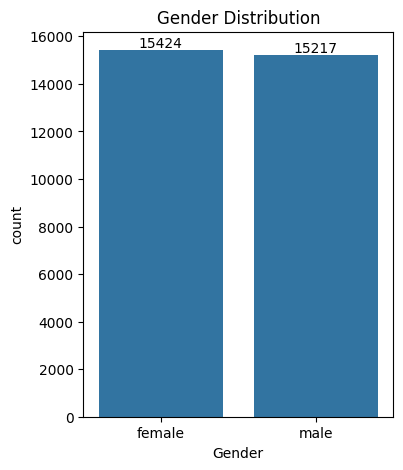

In [10]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

### From the above chart we have analysed that: the number of females in the data is more than the number of males

In [11]:
# group by parent education 
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


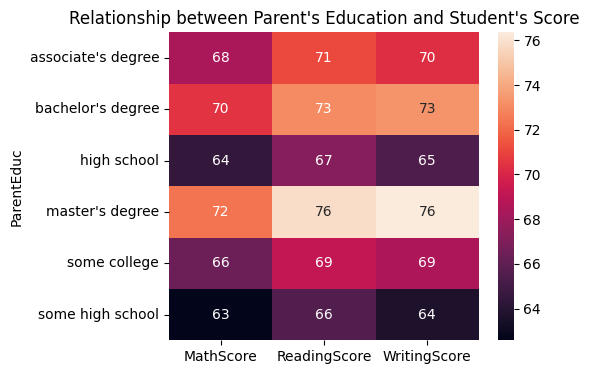

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

### From the above chart we have conclude that the education of parents have a good impact on student score.

In [13]:
# group by Parent's Marital Status
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


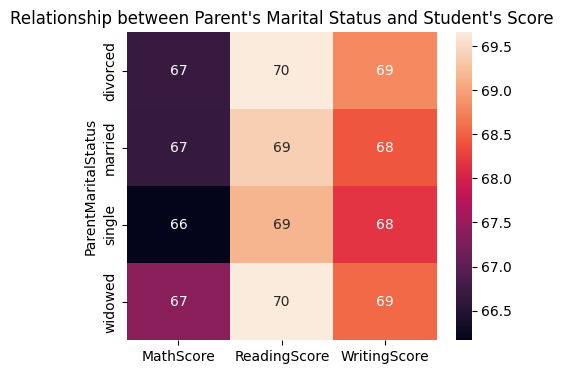

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(gb1, annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

### From the above chart we concluded that there is no/negligible impact on student's score due to their Parent's Marital Status.

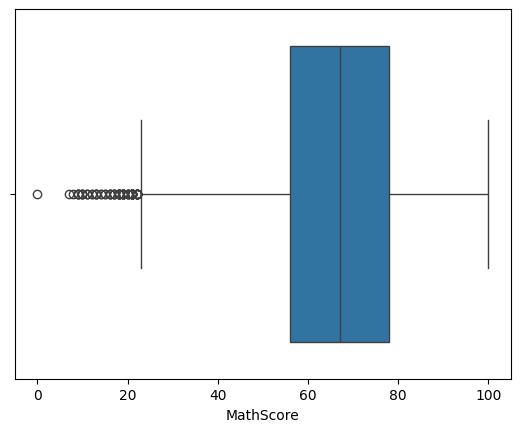

In [15]:
sns.boxplot(data=df, x="MathScore")
plt.show()

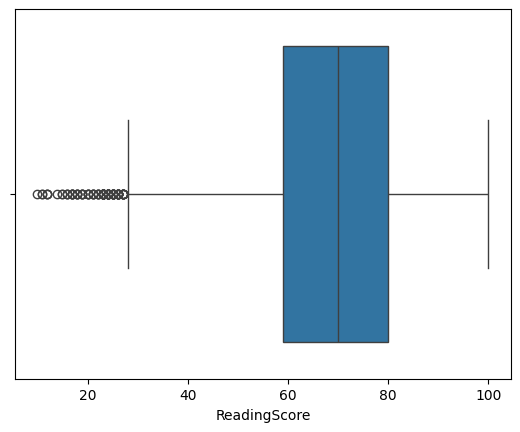

In [16]:
sns.boxplot(data=df, x="ReadingScore")
plt.show()

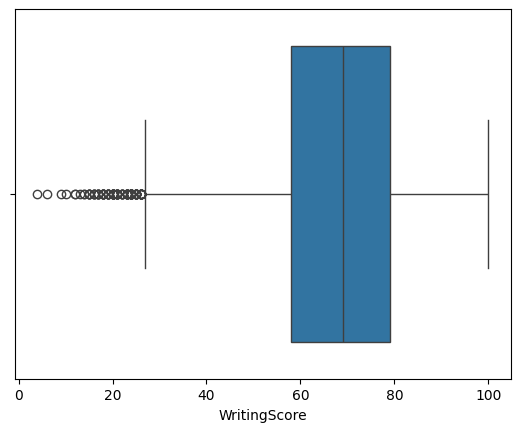

In [17]:
sns.boxplot(data=df, x="WritingScore")
plt.show()

In [18]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic group

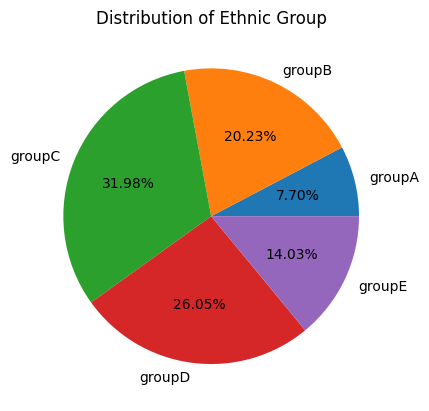

In [19]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ["groupA", "groupB", "groupC", "groupD", "groupE"]
mlist=[groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist, labels=l, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Group")
plt.show()

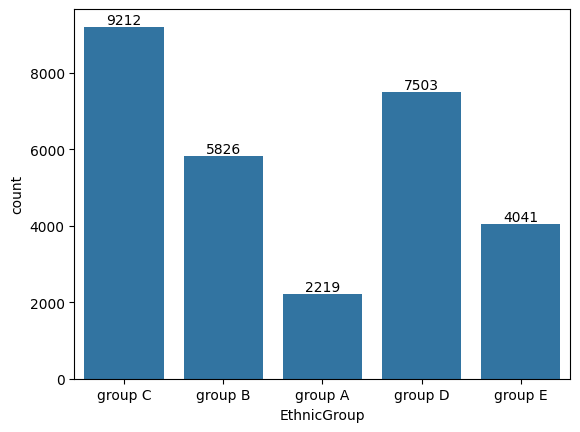

In [20]:
ax = sns.countplot(data=df, x="EthnicGroup")
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
print(mlist)

[2219, 5826, 9212, 7503, 4041]


In [22]:
# group by practice sport
gbsport = df.groupby("PracticeSport").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbsport)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


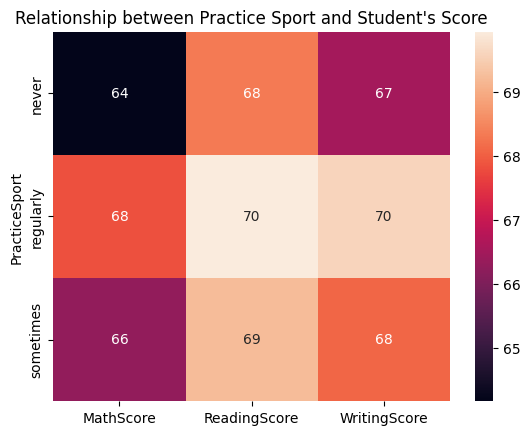

In [23]:
sns.heatmap(gbsport, annot=True)
plt.title("Relationship between Practice Sport and Student's Score")

plt.show()

### From the above graph we concluded that there is no/negligible impact on student's score due to their Practice sport

In [24]:
print(df['PracticeSport'].unique())

['regularly' 'sometimes' 'never' nan]


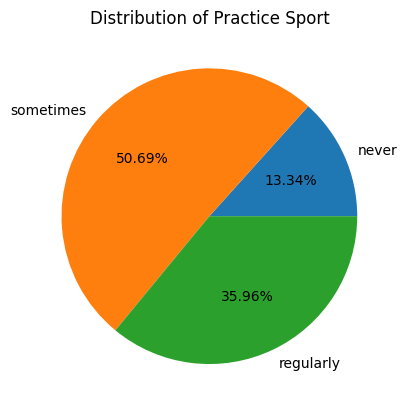

In [25]:
never = df.loc[(df['PracticeSport'] == 'never')].count()
sometimes = df.loc[(df['PracticeSport'] == 'sometimes')].count()
regularly = df.loc[(df['PracticeSport'] == 'regularly')].count()

sportlist = [never["PracticeSport"], sometimes["PracticeSport"], regularly["PracticeSport"]]

l=["never", "sometimes", "regularly"]
plt.pie(sportlist, labels=l, autopct='%1.2f%%')
plt.title("Distribution of Practice Sport")
plt.show()

In [26]:
# group by number of siblings
gbs = df.groupby(df['NrSiblings']).agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbs)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


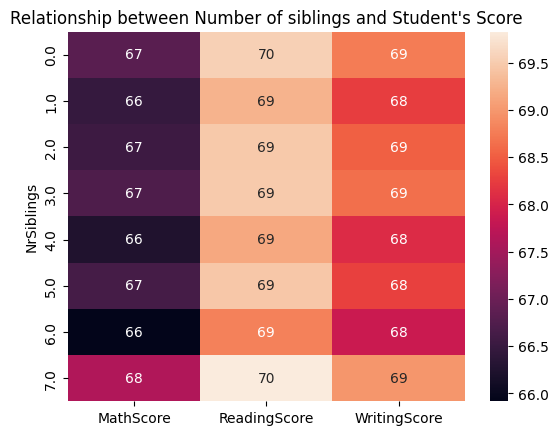

In [27]:
sns.heatmap(gbs, annot=True)
plt.title("Relationship between Number of siblings and Student's Score")

plt.show()

### From the above graph we concluded that there is no/negligible impact on student's score due to their No. of siblings

In [28]:
# group by Is First Child 

gbf=df.groupby(df['IsFirstChild']).agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbf)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


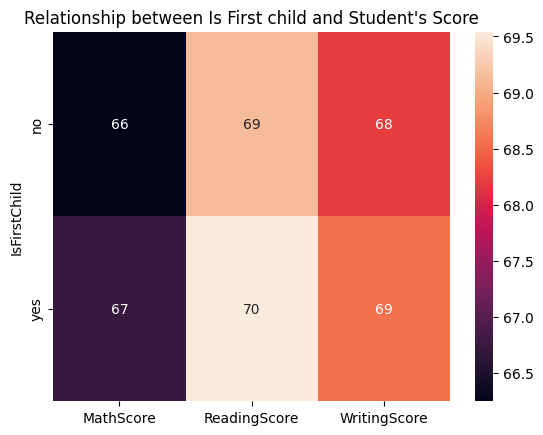

In [29]:
sns.heatmap(gbf, annot=True)
plt.title("Relationship between Is First child and Student's Score")
plt.show()

### From the above chart, we concluded that there is no/negligible impact on student's score Whether they are the first child or not.

In [30]:
# group by test preparation
gbtest = df.groupby(df['TestPrep']).agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbtest)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


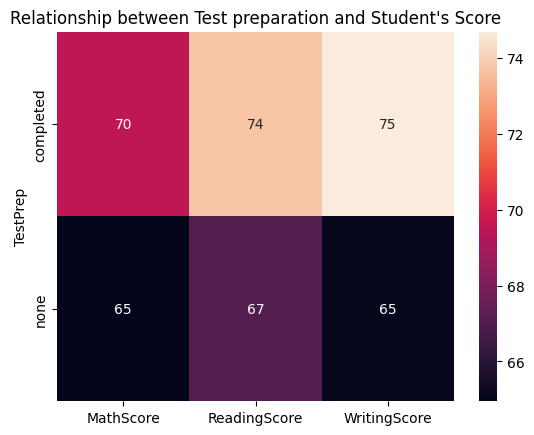

In [31]:
sns.heatmap(gbtest, annot=True)
plt.title("Relationship between Test preparation and Student's Score")
plt.show()

### From the above chart, we have concluded that test preparation has an impact on student scores. 
Students who completed test preparation scored higher compared to students who did not do any test preparation.

In [32]:
# group by lunch type
gblunch = df.groupby(df['LunchType']).agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gblunch)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


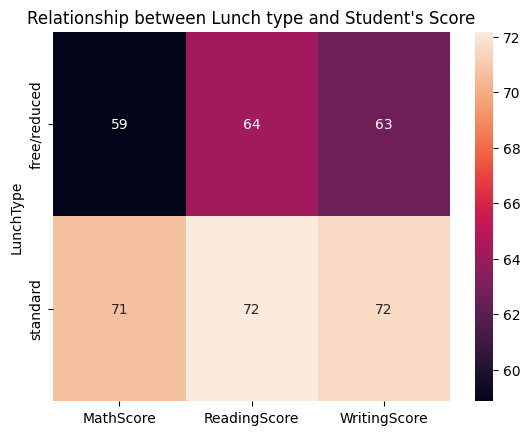

In [33]:
sns.heatmap(gblunch, annot=True)
plt.title("Relationship between Lunch type and Student's Score")
plt.show()

### From the above chart, we have concluded that Lunch type has impact on student scores. 
Students who have a standard lunch type scored higher compared to students who received a free or reduced lunch type.

In [34]:
# group by means of transport
gbtransport = df.groupby(df['TransportMeans']).agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gbtransport)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


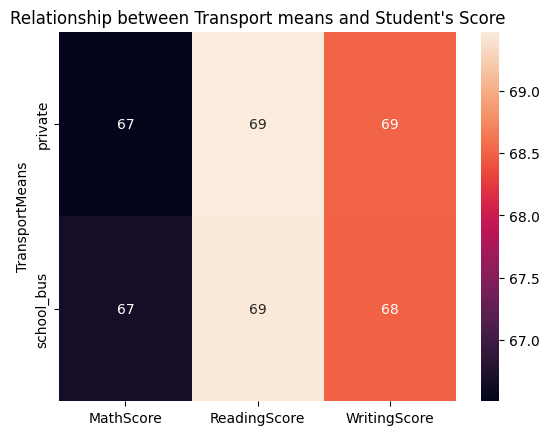

In [35]:
sns.heatmap(gbtransport, annot=True)
plt.title("Relationship between Transport means and Student's Score")
plt.show()

### From the above graph, we concluded that there is no impact on a student's score based on their means of transportation.